![alt text](http://www.focus.agh.edu.pl/img/agh.jpg "Logo AGH")
## Metody obliczeniowe w nauce i technice
### Laboratorium 5: Interpolacja - sprawozdanie
Mikołaj Pniak

---
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

Do realizacji zadania użyłem języka Julia. Wzór na wielomian interpolacyjny Lagrange'a:

**TU WSTAW RÓWNANIE LATEX**

Poniżej realizowane jest losowanie węzłów i zestawienie ich na wykresie wraz z wyliczonym wielomianem Lagrange'a.

In [39]:
x = 0:1:10
y = [rand() for a in x]

using Polynomials
function computeL(k, X)
    x_k = X[k]
    X = [x for x in X if x != x_k]
    p = Poly([1.0])
    q = 1
    for x_i in X
        p = p * poly([x_i])
        # poly tworzy wielomian na podstawie miejsc zerowych
        q = q * (x_k - x_i)
    end
    (p / q)
end

function lagrange(X, Y)
    p = Poly([0])
    for k in 1:1:length(Y)
        p = p + (computeL(k, X) * Y[k])
    end
    p
end
pxl = lagrange(x, y)

Poly(0.6983010212529499 + 8.833706257233466*x - 23.553573889079853*x^2 + 25.612722796492218*x^3 - 15.004711237863816*x^4 + 5.2397755092786396*x^5 - 1.1400377786038414*x^6 + 0.15587476224146884*x^7 - 0.013016037247133197*x^8 + 0.0006063331039496101*x^9 - 1.207152639262514e-5*x^10)

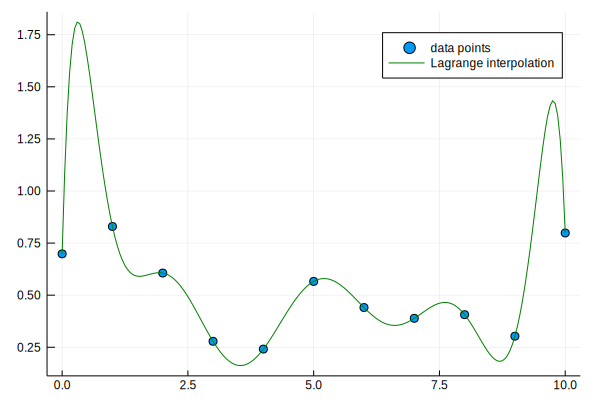

In [41]:
using Plots
xs = 0.0:0.05:10.0
scatter(x, y,
    label = "data points")
plot!(xs, polyval(pxl, xs),
    color=:green,
    label = "Lagrange interpolation")

---
- Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

Wzór na wielomian interpolacyjny Newtona:

In [49]:
function computeC(X, y_k, k, p_k)
    x_k = X[k]
    p = y_k - polyval(p_k, x_k)
    q = 1
    for i in 1:1:k-1
        q = q * (x_k - X[i])
    end
    (p / q)
end

function newton(X, Y, n)
    if n == 1
        Poly(float(Y[1]))
    else
        pp = newton(X, Y, n-1)
        c = computeC(X, Y[n], n, pp)
        poly([X[i] for i in 1:1:n-1]) * c + pp
    end
end

function newton(X, Y)
    newton(X, Y, length(Y))
end
pxn = newton(x,y)

Poly(0.6983010212529499 + 8.833706257220683*x - 23.55357388904377*x^2 + 25.612722796451134*x^3 - 15.004711237838578*x^4 + 5.2397755092693*x^5 - 1.1400377786016613*x^6 + 0.15587476224114602*x^7 - 0.013016037247103755*x^8 + 0.0006063331039481048*x^9 - 1.2071526392592128e-5*x^10)

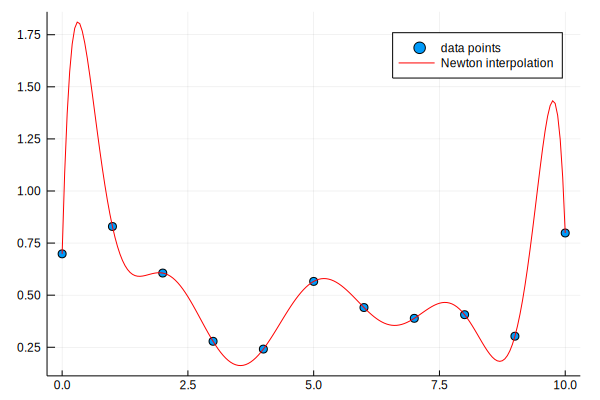

In [50]:
scatter(x, y,
    label = "data points")
plot!(xs, polyval(pxn, xs),
    color=:red,
    label = "Newton interpolation")

---
- Zastosowac interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

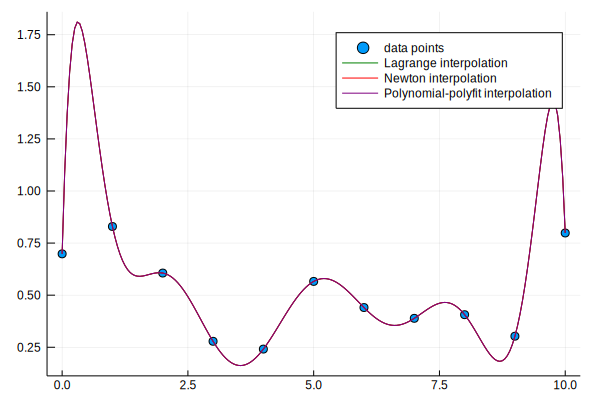

In [52]:
pxp = polyfit(x, y)
scatter(x, y,
    label = "data points")
plot!(xs, polyval(pxl, xs),
    color=:green,
    label = "Lagrange interpolation")
plot!(xs, polyval(pxn, xs),
    color=:red,
    label = "Newton interpolation")
plot!(xs, polyval(pxp, xs),
    color=:purple,
    label = "Polynomial-polyfit interpolation")

Zauważmy, że wykresy wielomianów pokrywają się. Dzieje się tak, gdyż są one równe; dla danych n+1 punktów istnieje __dokładnie jeden__ wielomian n-tego stopnia, który przez nie przechodzi.


---
- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.

Dokonujemy po 10 pomiarów dla 250, 500, ..., 2000 losowych węzłów, mierząc czasy po kolei każdą z metod.

In [126]:
using DataFrames
using Statistics
types=[];sizes=[];times=[]
range = 250:250:2000
for r in range
    x = 0:1:r
    for i in 1:1:10
        y = rand(Int, r+1)
        push!(types, "lagrange")
        push!(sizes, r)
        push!(times, @elapsed lagrange(x,y))
        push!(types, "newton")
        push!(sizes, r)
        push!(times, @elapsed newton(x,y))
        push!(types, "polyfit")
        push!(sizes, r)
        push!(times, @elapsed polyfit(x,y))
    end
end
df = DataFrame([types,sizes,times],[:Types,:Sizes,:Times])

┌ Info: Recompiling stale cache file /home/crunchy/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1187
┌ Warning: Module Compat with build ID 9619228787186 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:944
┌ Info: Recompiling stale cache file /home/crunchy/.julia/compiled/v1.0/CategoricalArrays/RHXoP.ji for CategoricalArrays [324d7699-5711-5eae-9e2f-1d82baa6b597]
└ @ Base loading.jl:1187
┌ Warning: Module Compat with build ID 9619228787186 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:944
┌ Info: Recompiling stale cache file /home/crunchy/.julia/compiled/v1.0/Tables/Z804B.ji for Tables [bd369af6-aec1-5ad0-b16a-f7cc5008161c]
└ @ Base loading.jl:1187


,Types,Sizes,Times
,Any,Any,Any
1,lagrange,250,0.502882
2,newton,250,0.137349
3,polyfit,250,2.3294
4,lagrange,250,0.244076
5,newton,250,0.00641231
6,polyfit,250,0.00207461
7,lagrange,250,0.198972
8,newton,250,0.00644504
9,polyfit,250,0.00216852


Grupujemy dane, wyliczając średnie czasów i średnie odchylenia.

In [130]:
dfex = by(df, [:Types],
    df1 -> by(df1, [:Sizes], 
        df2 -> DataFrame(
            Mean = mean(df2[:Times]),
            StdDeviation = sqrt(var(df2[:Times])))))

,Types,Sizes,Mean,StdDeviation
,Any,Any,Float64,Float64
1,lagrange,250,0.244255,0.0926961
2,lagrange,500,1.32143,0.0440076
3,lagrange,750,3.97315,0.307515
4,lagrange,1000,8.60568,0.26459
5,lagrange,1250,16.6931,0.669128
6,lagrange,1500,27.4442,0.662009
7,lagrange,1750,45.1167,2.30945
8,lagrange,2000,66.0355,1.41604
9,newton,250,0.0205449,0.0410658


Przedstawiam dane na wykresie.

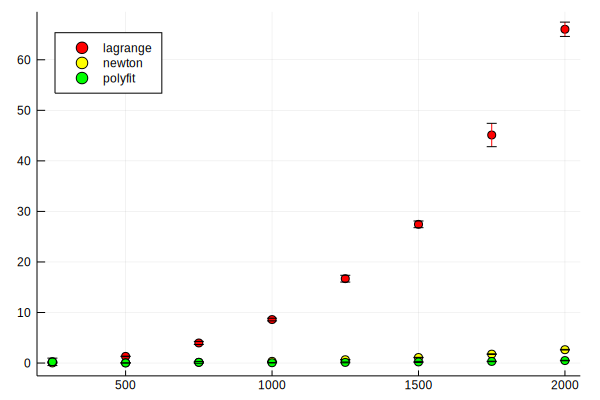

In [135]:
scatter(
        dfex[dfex[:Types].== "lagrange", :][:Sizes],
        dfex[dfex[:Types].== "lagrange", :][:Mean],
        yerr = dfex[dfex[:Types].== "lagrange", :][:StdDeviation],
        label = "lagrange",
        color = :red,
        legend = :topleft
    )
scatter!(
        dfex[dfex[:Types].== "newton", :][:Sizes],
        dfex[dfex[:Types].== "newton", :][:Mean],
        yerr = dfex[dfex[:Types].== "newton", :][:StdDeviation],
        label = "newton",
        color = :yellow
    )
scatter!(
        dfex[dfex[:Types].== "polyfit", :][:Sizes],
        dfex[dfex[:Types].== "polyfit", :][:Mean],
        yerr = dfex[dfex[:Types].== "polyfit", :][:StdDeviation],
        label = "polyfit",
        color = :lime
    )


Łatwo zauważyć, że metoda Lagrange'a ma gorszą złożoność od pozostałych metod. Widać, że metoda Newtona oraz algorytm polyfit są do siebie zbliżone, przedstawię poglądowo ich wyniki na przeskalowanym wykresie.

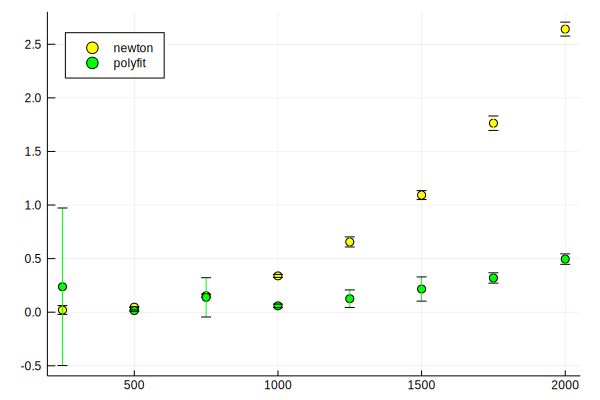

In [136]:
scatter(
        dfex[dfex[:Types].== "newton", :][:Sizes],
        dfex[dfex[:Types].== "newton", :][:Mean],
        yerr = dfex[dfex[:Types].== "newton", :][:StdDeviation],
        label = "newton",
        color = :yellow,
        legend = :topleft
    )
scatter!(
        dfex[dfex[:Types].== "polyfit", :][:Sizes],
        dfex[dfex[:Types].== "polyfit", :][:Mean],
        yerr = dfex[dfex[:Types].== "polyfit", :][:StdDeviation],
        label = "polyfit",
        color = :lime
    )

_Wyjątkowo duże odchylenie dla polyfit wielkości 250 spowodowane jest prawdopodobnie ładowaniem biblioteki - dokładnie **pierwszy** z wyników jest mocno zniekształcony._

---
- Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.
- Zademonstrowac efekt Rungego. 

In [160]:
using Interpolations
x = 1:1:10
y = [rand() for a in x]
pxp = polyfit(x,y)
ixc = CubicSplineInterpolation(x,y)
ixl = interpolate(y, BSpline(Linear()))
xs = 1.0:0.05:10.0

1.0:0.05:10.0

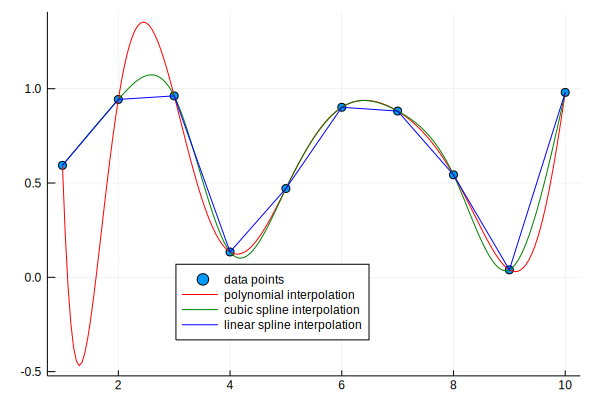

In [167]:
scatter(x, y,
    label = "data points",
    legend = :bottom)
plot!(xs, polyval(pxp, xs),
    label = "polynomial interpolation",
    color = :red)
plot!(xs, [ixc(i) for i in xs],
    label = "cubic spline interpolation",
    color = :green)
plot!(xs, [ixl(i) for i in xs],
    label = "linear spline interpolation",
    color = :blue)

Dobrze widać na wykresie, że o ile przybliżanie wielomianem działa po naszej myśli dla większości węzłów, o tyle na jednym z końców kompletnie nam się rozjeżdża. Zobaczmy, co się stanie dla większej ilości węzłów:

In [168]:
x = 1:1:15
y = [rand() for a in x]
pxp = polyfit(x,y)
ixc = CubicSplineInterpolation(x,y)
ixl = interpolate(y, BSpline(Linear()))
xs = 1.0:0.05:15.0

1.0:0.05:15.0

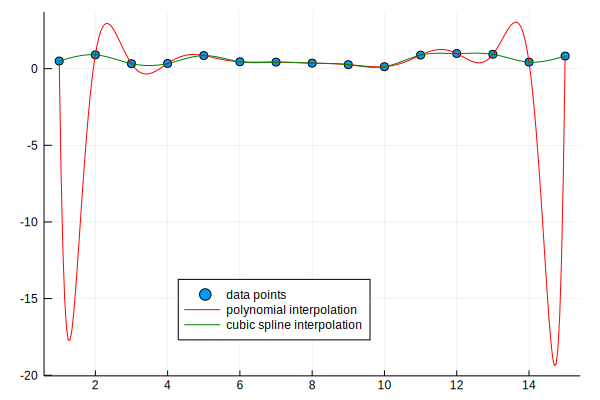

In [170]:
scatter(x, y,
    label = "data points",
    legend = :bottom)
plot!(xs, polyval(pxp, xs),
    label = "polynomial interpolation",
    color = :red)
plot!(xs, [ixc(i) for i in xs],
    label = "cubic spline interpolation",
    color = :green)

Można powiedzieć, że dla tego przypadku (15 węzłów) odchylenia zwalają z nóg (sięgają ponad 1700%)! To zjawisko nazywamy efektem Rungego. Jest głównym powodem, dlaczego nie powinno się interpolować wielomianami dla więcej niż kilku węzłów. 